# Importing the libraries

In [137]:
# Dataframe manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

# Modelling Helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Setup complete...")

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

Setup complete...


# Common function

In [138]:
#######################################################################
### DefineTarget
#######################################################################
def DefineTarget(target_val):
    if(target_val == 'Yes'):
        target_val = 1
    else:
        target_val = 0
    
    return target_val


#######################################################################
### Descriptive Statistics
#######################################################################
def DescriptiveStatistics(df):
    countvar = df.count()
    meanvar = np.round(df.mean(),1)
    minvar = df.min()
    maxvar = df.max()
    stdvar = np.round(df.std(),1)
    statistics_df = pd.concat([meanvar,minvar,maxvar,stdvar,countvar],axis=1)
    statistics_df = pd.DataFrame(statistics_df).reset_index()
    orgname = list(statistics_df.columns.values)
    statistics_df.rename(columns={orgname[0]:'variable',
                                  orgname[1]:'mean',
                                  orgname[2]:'min',
                                  orgname[3]:'max',
                                  orgname[4]:'std',
                                  orgname[5]:'non_missing'},
                                  inplace = True)
    statistics_df['Total'] = df.shape[0]
    statistics_df['miss_per'] = np.round(100*(statistics_df['Total'] - statistics_df['non_missing'])/statistics_df['Total'],1)
    
    return statistics_df


#######################################################################
### Check_Missing_Data
#######################################################################
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data


#######################################################################
### Create dummy varibales
#######################################################################
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e]=objdf_new[e] + "_" + str(i)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname])
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy


#######################################################################
### ModelSelection
#######################################################################
def ModelSelection(X_train, y_train, X_test, y_test):
    
    # Import libraries
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from lightgbm import LGBMClassifier
    from sklearn.svm import SVC, LinearSVC
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from xgboost import XGBClassifier
    from sklearn.neural_network import MLPClassifier
    
    # Test options and evaluation metric
    seed = 7
    scoring = 'accuracy'
    
    # Initialize the classifier models with their default parameters and add them to the list
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Train model
    # evaluate each model in turn
    from sklearn import model_selection
    from sklearn.model_selection import train_test_split
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    results_df = pd.DataFrame(results)
    print(results_df)
    
    plt.figure(figsize=(15,10))
    sns.boxplot(data=results_df)
    plt.show()
    
    # Make predictions on validation dataset
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(name)
        print('Accuracy score: ',accuracy_score(y_test, predictions))
        print(classification_report(y_test, predictions))

# Importing the dataset

In [139]:
dataset = pd.read_csv('iris.csv')
print(dataset.shape)
dataset.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [140]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Data Preparation

#### remove unnesscary variables

#### rename columns

#### Remove duplicated rows

#### define target variable

#### reset index

In [141]:
dataset = dataset.reset_index(drop = True)
dataset.shape
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

### Data type

In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Descriptive Statistics

In [143]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [144]:
stats_df = DescriptiveStatistics(dataset)
stats_df

,variable,mean,min,max,std,non_missing,Total,miss_per
0,PetalLengthCm,3.8,1,6.9,1.8,150,150,0.0
1,PetalWidthCm,1.2,0.1,2.5,0.8,150,150,0.0
2,SepalLengthCm,5.8,4.3,7.9,0.8,150,150,0.0
3,SepalWidthCm,3.1,2,4.4,0.4,150,150,0.0
4,Species,NaN,Iris-setosa,Iris-virginica,NaN,150,150,0.0


# Check and handling missing data

In [145]:
missing_values_df = Check_Missing_Data(dataset)
missing_values_df

,Total,Percent
Species,0,0.0
PetalWidthCm,0,0.0
PetalLengthCm,0,0.0
SepalWidthCm,0,0.0
SepalLengthCm,0,0.0


In [146]:
# Selecting columns with low rate of missing data
selected_columns_df = missing_values_df.loc[missing_values_df.Percent <= 0.2,:]
print(selected_columns_df.shape)
selected_columns_df

selected_columns = selected_columns_df.index.values
dataset = dataset[selected_columns]
dataset.shape

(5, 2)


(150, 5)

### Replacting missing valules

In [147]:
# X.fillna(0, inplace = True)

In [148]:
dataset.shape

(150, 5)

# Categorize variables

### Categorical variables

In [149]:
objtype = ['object']
objdf = dataset.select_dtypes(include=objtype)

categorical_list = objdf.columns
print(categorical_list)
objdf.head()

Index(['Species'], dtype='object')


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


#### Check levels for each categorical variable

In [150]:
for cat in categorical_list:
    varname=list(objdf[cat].unique())
    var=[v for v in list(varname)]
    print ('levels of '+ cat + " is ", var)
    print ('# of levels for '+ cat+" is " , len(var)) 
    print ('# of obs for each level of '+ cat+": ")
    print (objdf[cat].value_counts())
    print(objdf[cat].value_counts()/len(objdf[cat]))
    print('--------------------------------------------------')
    print('')

levels of Species is  ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# of levels for Species is  3
# of obs for each level of Species: 
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64
--------------------------------------------------



In [151]:
removed_cols = ['Species']  # target variables
categorical_list = [e for e in categorical_list if e not in removed_cols]
objdf = objdf.loc[:,categorical_list]
objdf.head()

""
0
1
2
3
4


### Numerical variables

In [152]:
# Create a sub-dataframe to store all numeric variables in the whole data frame
datatypes= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = dataset.select_dtypes(include=datatypes)

numerical_list = numdf.columns
print(numerical_list)
numdf.head()

Index(['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm', 'SepalLengthCm'], dtype='object')


,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0


In [153]:
removed_cols = []
numerical_list = [e for e in numerical_list if e not in removed_cols]
numdf = numdf.loc[:,numerical_list]
numdf.head()

,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0


### Binary variables

In [154]:
bin_list = []
bindf = dataset.loc[:,bin_list]
bindf.head()

""
0
1
2
3
4


### Datetime variables

# Data Visualiation

### Target variable Analysis

In [155]:
dataset.Species.value_counts()/dataset.shape[0]

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

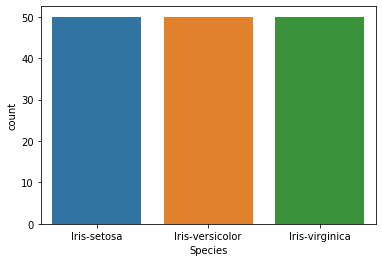

In [156]:
# Compare distribution between 2 classes
sns.countplot(x='Species', data=dataset)
plt.show()

### Numerical variables

#### Correlation matrix

[]

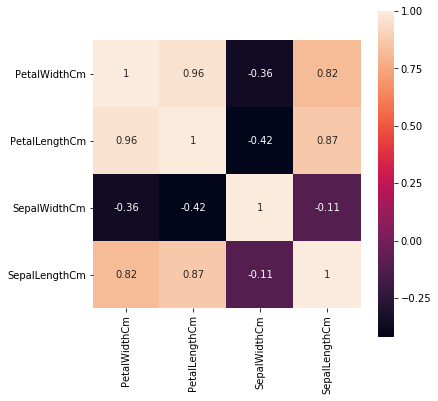

In [157]:
corr = dataset.corr()
plt.figure(figsize = (6,6))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)
plt.plot()

#### Violin plot 

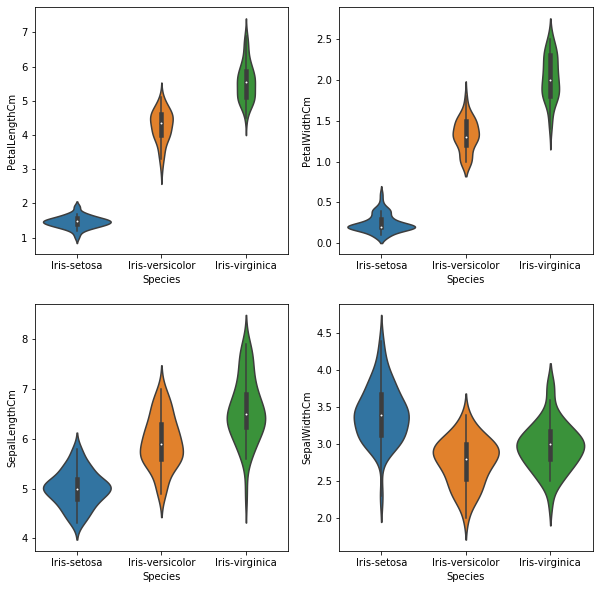

In [158]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=dataset)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=dataset)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=dataset)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=dataset)

#### Histograms

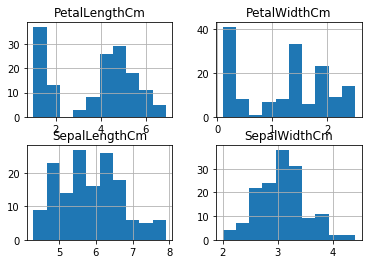

In [159]:
dataset.hist()
plt.show()

#### Scatter plot

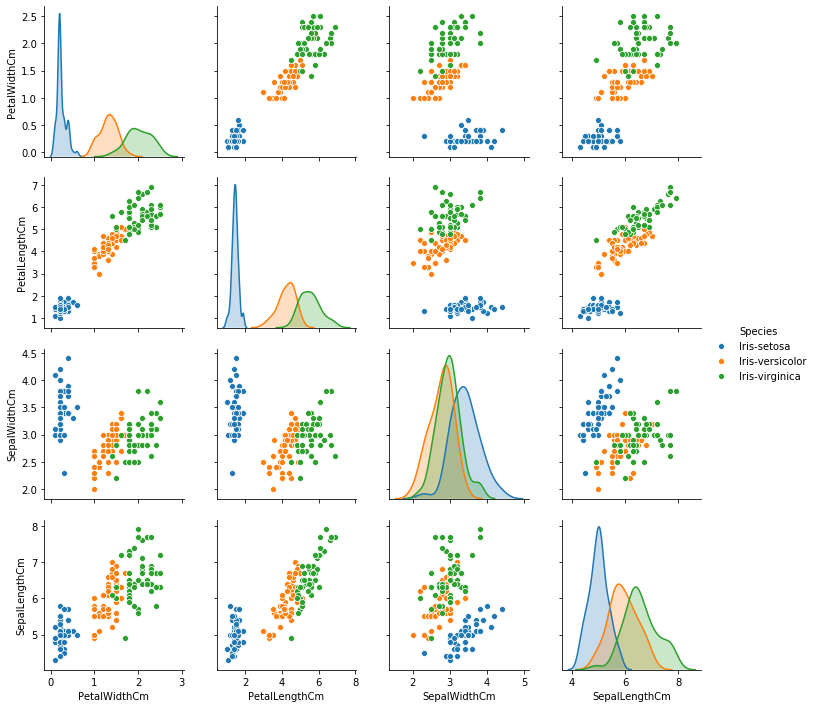

In [160]:
# Let's try the Seaborn pairplot
sns.pairplot(dataset, hue = 'Species')

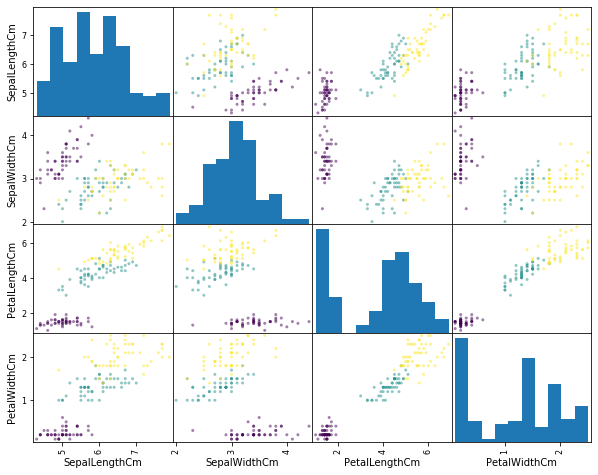

In [161]:
from pandas.plotting import scatter_matrix
tmp_df = dataset.copy()
tmp_df['Color'] = 0
tmp_df.loc[tmp_df.Species == 'Iris-versicolor','Color'] = 1
tmp_df.loc[tmp_df.Species == 'Iris-virginica','Color'] = 2
# scatter plot matrix
scatter_matrix(tmp_df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], c=tmp_df['Color'],figsize=(10,8))
plt.show()

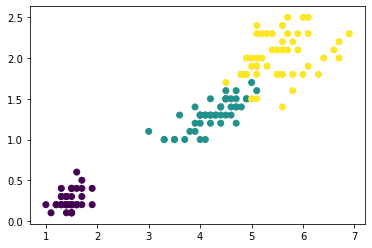

In [162]:
plt.scatter(tmp_df['PetalLengthCm'], tmp_df['PetalWidthCm'], c=tmp_df['Color'])
plt.show()

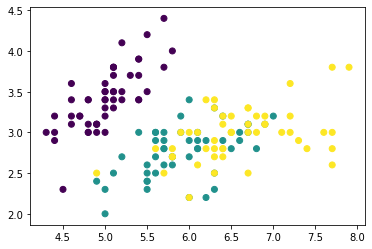

In [163]:
plt.scatter(tmp_df['SepalLengthCm'], tmp_df['SepalWidthCm'], c=tmp_df['Color'])
plt.show()

#### 3D plot

Text(0.5, 0.92, '3D plot')

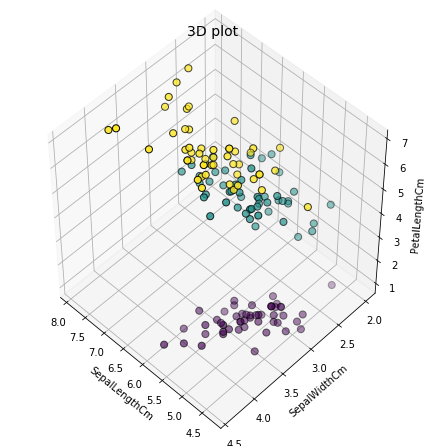

In [164]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(tmp_df.loc[:, 'SepalLengthCm'], tmp_df.loc[:, 'SepalWidthCm'],tmp_df.loc[:, 'PetalLengthCm'],
          c=tmp_df.Color.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
plt.title("3D plot", fontsize=14)

Text(0.5, 0.92, '3D plot')

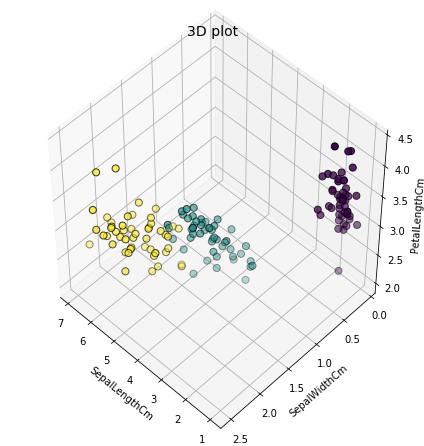

In [165]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(tmp_df.loc[:, 'PetalLengthCm'], tmp_df.loc[:, 'PetalWidthCm'],tmp_df.loc[:, 'SepalWidthCm'],
          c=tmp_df.Color.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
plt.title("3D plot", fontsize=14)

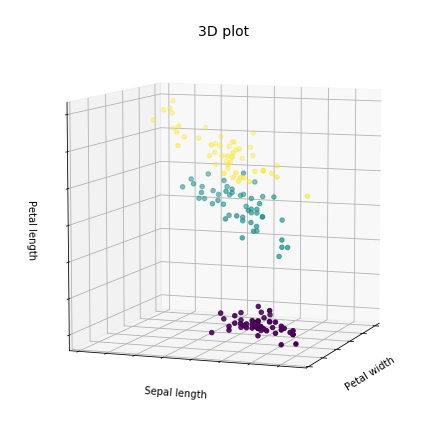

In [166]:
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(6,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()
ax.scatter(tmp_df.loc[:, 'PetalWidthCm'], tmp_df.loc[:, 'SepalLengthCm'], tmp_df.loc[:, 'PetalLengthCm'], c=tmp_df.Color.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.title("3D plot", fontsize=14)
plt.show()

### Categorical variables

# Data Preprocessing

### Numerical variables

#### Scaling dataset

In [167]:
numdf.head()

,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0


In [168]:
from sklearn.preprocessing import StandardScaler
numdf_norm = pd.DataFrame(StandardScaler().fit_transform(numdf))
numdf_norm.columns = numdf.columns
numdf_norm.head()

,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
0,-1.312977,-1.341272,1.032057,-0.900681
1,-1.312977,-1.341272,-0.124958,-1.143017
2,-1.312977,-1.398138,0.337848,-1.385353
3,-1.312977,-1.284407,0.106445,-1.506521
4,-1.312977,-1.341272,1.263460,-1.021849


In [169]:
#from sklearn.preprocessing import MinMaxScaler
#numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(numdf))
#numdf_norm.columns = numdf.columns
#numdf_norm = numdf_norm.drop(['Target'],axis=1)
#numdf_norm.head()

### Categorical variables

#### Create dummy varibales

#### One hot coding

### Combine all predictors

In [170]:
print(numdf_norm.shape)
print(objdf.shape)
print(bindf.shape)

(150, 4)
(150, 0)
(150, 0)


In [171]:
X = pd.concat([numdf_norm,objdf,bindf], axis=1)
print (X.shape)
y = dataset['Species']
print (y.shape)

(150, 4)
(150,)


In [172]:
X.head()

,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
0,-1.312977,-1.341272,1.032057,-0.900681
1,-1.312977,-1.341272,-0.124958,-1.143017
2,-1.312977,-1.398138,0.337848,-1.385353
3,-1.312977,-1.284407,0.106445,-1.506521
4,-1.312977,-1.341272,1.263460,-1.021849


### Save preprocessed data

In [173]:
df = pd.concat([X,y],axis=1)
df.to_csv('Iris-preprocessed.csv',index=False)

In [174]:
X.head()

,PetalWidthCm,PetalLengthCm,SepalWidthCm,SepalLengthCm
0,-1.312977,-1.341272,1.032057,-0.900681
1,-1.312977,-1.341272,-0.124958,-1.143017
2,-1.312977,-1.398138,0.337848,-1.385353
3,-1.312977,-1.284407,0.106445,-1.506521
4,-1.312977,-1.341272,1.263460,-1.021849


# Splitting the dataset into the Training set and Test set

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [176]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Model Selection

### Initialize the classifier models with their default parameters and add them to the list

In [177]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(kernel="linear")))
models.append(('LSVC', SVC(kernel="rbf")))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('LGB',LGBMClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('NN',MLPClassifier()))
models.append(('XGB',XGBClassifier()))

### Config parameters

In [178]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

### Train models

In [179]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.947727 (0.056737)
SVC: 0.955303 (0.060459)
LSVC: 0.965152 (0.042748)
LR: 0.895455 (0.088982)
DT: 0.955303 (0.044748)
GNB: 0.947727 (0.056737)
RF: 0.947727 (0.056737)
GB: 0.946970 (0.043387)
LGB: 0.947727 (0.056737)
ADA: 0.947727 (0.056737)
QDA: 0.973485 (0.040550)
NN: 0.938636 (0.068304)
XGB: 0.956061 (0.044018)


In [180]:
results_df = pd.DataFrame(results)
results_df

,KNN,SVC,LSVC,LR,DT,GNB,RF,GB,LGB,ADA,QDA,NN,XGB
0,0.916667,1.000000,0.916667,0.833333,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,1.000000,0.916667,0.916667
1,0.833333,0.916667,0.916667,0.666667,1.000000,0.833333,0.833333,0.916667,0.833333,0.833333,0.916667,0.833333,0.916667
2,1.000000,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.909091,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.909091,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000
5,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.909091,1.000000,1.000000,0.909091,0.909091,1.000000,0.909091,0.909091,0.909091,0.909091,1.000000,1.000000,0.909091
8,0.909091,0.818182,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.818182,0.909091
9,1.000000,0.909091,1.000000,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091


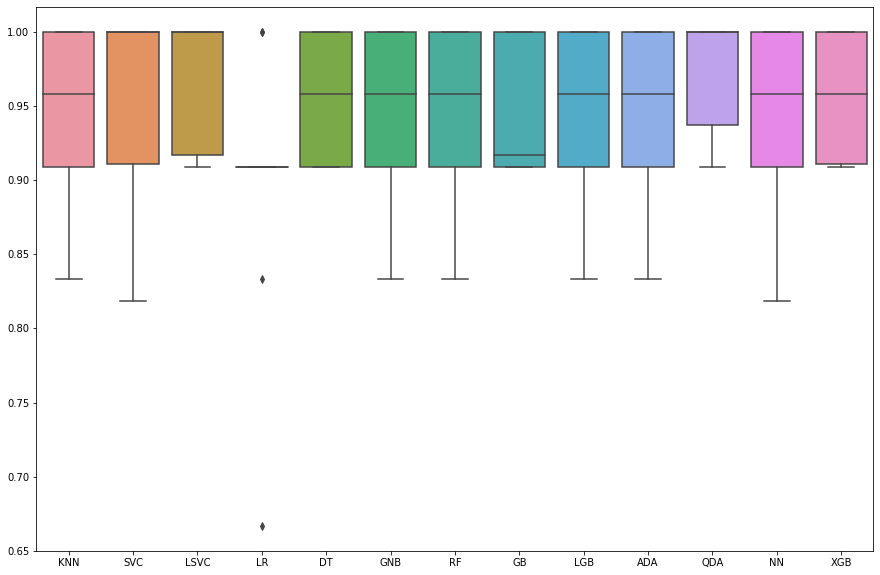

In [181]:
plt.figure(figsize=(15,10))
sns.boxplot(data=results_df)
plt.show()

### Predicting

In [182]:
# Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print('Accuracy score: ',accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
Accuracy score:  0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

SVC
Accuracy score:  0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

LSVC
Accuracy score:  0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa  

KNN: 0.947727 (0.056737)
SVC: 0.955303 (0.060459)
LSVC: 0.965152 (0.042748)
LR: 0.895455 (0.088982)
DT: 0.946970 (0.043387)
GNB: 0.947727 (0.056737)
RF: 0.938636 (0.068304)
GB: 0.946970 (0.043387)
LGB: 0.947727 (0.056737)
ADA: 0.947727 (0.056737)
QDA: 0.973485 (0.040550)
NN: 0.930303 (0.083937)
XGB: 0.956061 (0.044018)
        KNN       SVC      LSVC        LR        DT       GNB        RF  \
0  0.916667  1.000000  0.916667  0.833333  0.916667  0.916667  0.916667   
1  0.833333  0.916667  0.916667  0.666667  0.916667  0.833333  0.833333   
2  1.000000  1.000000  1.000000  0.909091  1.000000  1.000000  1.000000   
3  0.909091  0.909091  1.000000  0.909091  1.000000  0.909091  1.000000   
4  1.000000  1.000000  0.909091  0.909091  1.000000  1.000000  1.000000   
5  1.000000  1.000000  1.000000  1.000000  0.909091  1.000000  1.000000   
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7  0.909091  1.000000  1.000000  0.909091  0.909091  1.000000  0.909091   
8  0

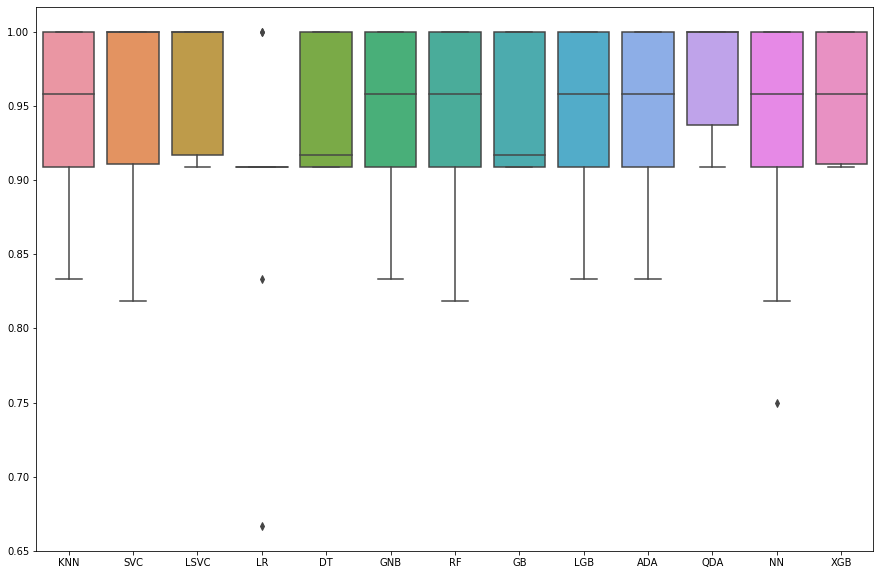

KNN
Accuracy score:  0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

SVC
Accuracy score:  0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

LSVC
Accuracy score:  0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa  

In [183]:
ModelSelection(X_train, y_train, X_test, y_test)

# Logistic Regression

### Training model

In [184]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Applying k-Fold Cross Validation

In [185]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

### Creating Summary Table

#### Find the intercept and coefficients

In [186]:
classifier.intercept_

array([-1.48880621, -1.00572389, -2.23513463])

In [187]:
classifier.coef_

array([[-1.41822519, -1.5631516 ,  1.28807494, -0.79339466],
       [-0.74777041,  0.65341284, -1.13846044,  0.0617203 ],
       [ 2.38568433,  1.67227345, -0.08390407,  0.05238078]])

#### Summary table

In [188]:
feature_name = X.columns.values
feature_name

array(['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm', 'SepalLengthCm'],
      dtype=object)

In [189]:
summary_table = pd.DataFrame(columns=['feature_name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(classifier.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending = False)

ValueError: Wrong number of items passed 3, placement implies 1

### Predicting

In [190]:
# Predicting the Train set results
y_train_pred = classifier.predict(X_train)
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

### Calculate Probability

In [191]:
train_proba = classifier.predict_proba(X_train)
test_proba = classifier.predict_proba(X_test)
test_proba[0:5]

array([[2.92712074e-03, 2.17971121e-01, 7.79101759e-01],
       [1.89958856e-02, 8.94922837e-01, 8.60812770e-02],
       [9.80960316e-01, 1.86585530e-02, 3.81131321e-04],
       [8.74767531e-04, 3.40793209e-01, 6.58332023e-01],
       [8.77331825e-01, 1.22238667e-01, 4.29507982e-04]])

### Evaluating model

#### Overall Accuracy

In [192]:
# On train set
print(classifier.score(X_train, y_train))
# On test set
print(classifier.score(X_test, y_test))

0.9107142857142857
0.8157894736842105


#### Confusion Matrix

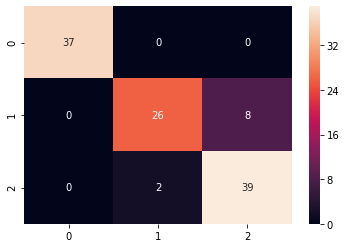

In [193]:
# Training set
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

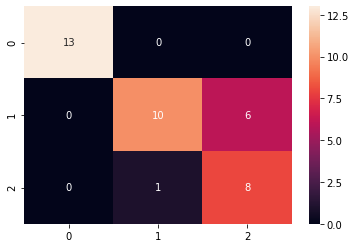

In [194]:
# Test set
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)

#### Classification Report

In [195]:
print(classification_report(y_train, y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.93      0.76      0.84        34
 Iris-virginica       0.83      0.95      0.89        41

       accuracy                           0.91       112
      macro avg       0.92      0.91      0.91       112
   weighted avg       0.92      0.91      0.91       112



In [196]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.91      0.62      0.74        16
 Iris-virginica       0.57      0.89      0.70         9

       accuracy                           0.82        38
      macro avg       0.83      0.84      0.81        38
   weighted avg       0.86      0.82      0.82        38



### Tuning hyper parameters

#### Apply Grid Search

In [197]:
params = {'C': [0.01,0.1,1,10,100,1000]}
grid_clf = GridSearchCV(LogisticRegression(), params, refit=True, scoring = 'accuracy', cv = 10, verbose = 2)

#### Train - Test Split

In [198]:
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


{'C': 100}

#### Re-run with the best parameters

In [199]:
classifier = grid_clf.best_estimator_
classifier.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting

In [200]:
# Predicting the Train set results
y_train_pred = classifier.predict(X_train)
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

#### Evaluation Metrics

In [201]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[37  0  0]
 [ 0 32  2]
 [ 0  1 40]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.94      0.96        34
 Iris-virginica       0.95      0.98      0.96        41

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112



In [202]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Random Forest

### Training model

In [203]:
classifier = RandomForestClassifier(n_estimators=20)

#### Train - Test split

In [204]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Cross validation

In [205]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

### Predict

In [88]:
# Predicting the Train set results
y_train_pred = grid_clf.predict(X_train)
# Predicting the Test set results
y_test_pred = grid_clf.predict(X_test)

### Evaluating model

#### Overal Accuracy

In [89]:
# Train
print("Train Accuracy:", accuracy_score(y_train,y_train_pred))

# Test
print("Test Accuracy:", accuracy_score(y_test,y_test_pred))

Train Accuracy: 0.9732142857142857
Test Accuracy: 0.9736842105263158


In [206]:
# Validation set
print(accuracies.mean())
print(accuracies.std())

0.9448834498834499
0.06383394555420618


#### Confusion Matrix

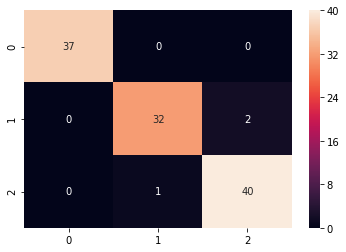

In [207]:
# Training set
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

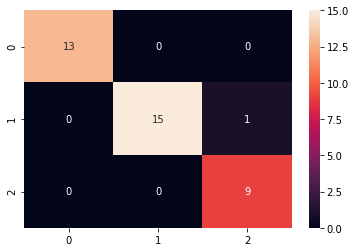

In [208]:
# Training set
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True)

#### Classification report

In [209]:
# Train
print(classification_report(y_train, y_train_pred))

# Test
print(classification_report(y_test,y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.94      0.96        34
 Iris-virginica       0.95      0.98      0.96        41

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Model Interpretation

#### Important Features

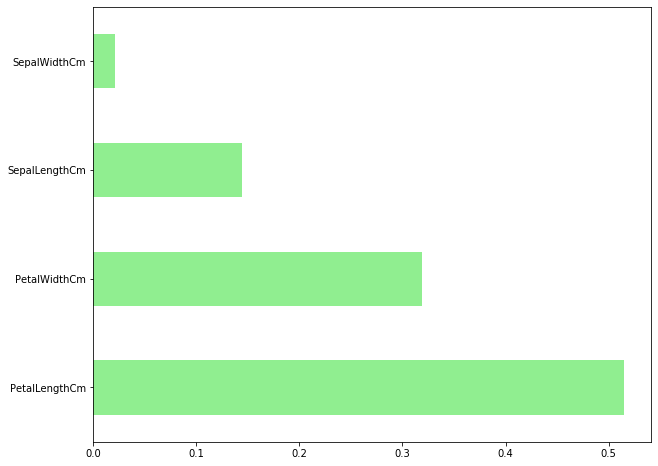

In [211]:
ax = (pd.Series(classifier.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh', figsize=(10,8), color='lightgreen'))
plt.show()

### Tuning hyper parameters

#### Apply RandomizedSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

In [95]:
grid_clf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

#### Apply GridSearchCV

In [597]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
}

In [598]:
grid_clf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.4s finished


{'n_estimators': 275,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': True}

#### Re-run model with best parameters

In [96]:
classifier = grid_clf.best_estimator_
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predicting

In [97]:
# Predicting the Train set results
y_train_pred = classifier.predict(X_train)
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

#### Evaluation Metrics

In [98]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[37  0  0]
 [ 0 32  2]
 [ 0  0 41]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      0.94      0.97        34
 Iris-virginica       0.95      1.00      0.98        41

       accuracy                           0.98       112
      macro avg       0.98      0.98      0.98       112
   weighted avg       0.98      0.98      0.98       112



In [99]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# SVM

### Training model

In [100]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Applying k-Fold Cross Validation

In [101]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

### Predicting

In [102]:
# Predicting the Train set results
y_train_pred = classifier.predict(X_train)
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

### Model Evaluation

#### Overall Accuracy

In [103]:
# On train set
print(classifier.score(X_train, y_train))
# On test set
print(classifier.score(X_test, y_test))

0.9732142857142857
0.9736842105263158


In [104]:
# Validation set
print(accuracies.mean())
print(accuracies.std())

0.9556410256410256
0.06334734610889475


#### Confusion Matrix

[[37  0  0]
 [ 0 33  1]
 [ 0  2 39]]


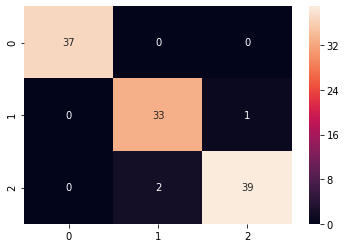

In [105]:
# Training set
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
sns.heatmap(cm, annot=True)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


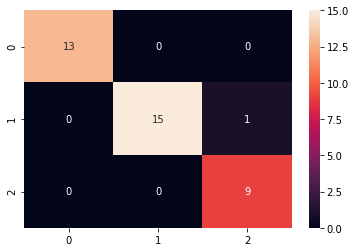

In [106]:
# Test set
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
sns.heatmap(cm, annot=True)

#### Classification Report

In [107]:
print(classification_report(y_train, y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.94      0.97      0.96        34
 Iris-virginica       0.97      0.95      0.96        41

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112



In [108]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Tuning hyper parameters

#### Apply grid search

In [109]:
params = {
    'C': [0.1,0.8,0.9,1.1,1.2,1.3,1.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1,0.8,0.9,1.1,1.2,1.3,1.4]
}

grid_clf = GridSearchCV(SVC(), param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

#### Train model

In [110]:
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 10 folds for each of 98 candidates, totalling 980 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] .................. C=0.9, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.9, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=linear .................................
[CV] .................. C=0.9, gamma=1.2, kernel=linear, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] .

[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=1.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .................. C=1.1, gamma=1.4, kernel=linear, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=linear .................................
[CV] .

[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=linear .................................
[CV] .................. C=1.2, gamma=0.9, kernel=linear, total=   0.0s
[CV] C

[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .................. C=1.3, gamma=1.1, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=linear .................................
[CV] .................. C=1.3, gamma=1.1, kernel=linear, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.4, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.9, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.3, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 980 out of 980 | elapsed:    3.3s finished


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

#### Re-runing models with best parameters

In [111]:
classifier = grid_clf.best_estimator_
classifier.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting

In [112]:
# Predicting the Train set results
y_train_pred = grid_clf.predict(X_train)
# Predicting the Test set results
y_test_pred = grid_clf.predict(X_test)

#### Evaluation Metrics

In [113]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[37  0  0]
 [ 0 33  1]
 [ 0  2 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.94      0.97      0.96        34
 Iris-virginica       0.97      0.95      0.96        41

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112



In [114]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# GaussianNB

### Training model

In [115]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predicting

In [116]:
# On train set
y_train_pred = classifier.predict(X_train)

# On test set
y_test_pred = classifier.predict(X_test)

### Evaluating model

#### Confusion Matrix

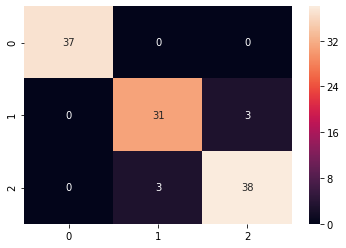

In [117]:
# Training set
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

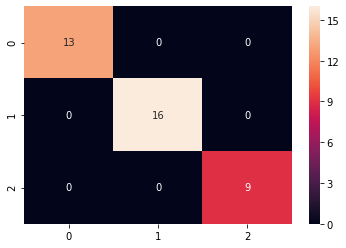

In [118]:
# Test set
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)

#### Classification Report

In [119]:
print(classification_report(y_train, y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.91      0.91      0.91        34
 Iris-virginica       0.93      0.93      0.93        41

       accuracy                           0.95       112
      macro avg       0.95      0.95      0.95       112
   weighted avg       0.95      0.95      0.95       112



In [120]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



# KNN

### Training model

In [121]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred_i= classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### Select k values

Text(0, 0.5, 'Error Rate')

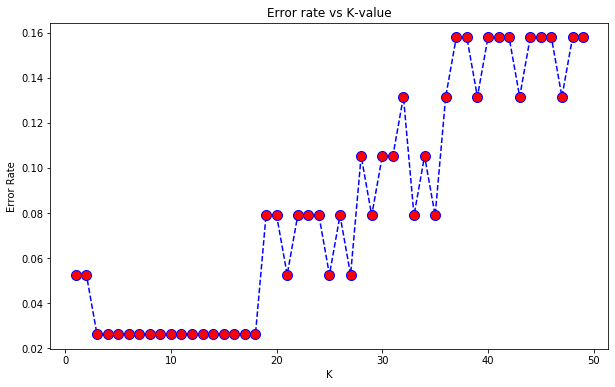

In [122]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### select k = 3

In [123]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Predicting

In [124]:
# Predicting the Train set results
y_train_pred = classifier.predict(X_train)
# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

### Evaluating model

#### Accuracy score

In [125]:
# On train set
print(accuracy_score(y_train,y_train_pred))
# On test set
print(accuracy_score(y_test,y_test_pred))

0.9732142857142857
0.9736842105263158


#### Confusion matrix

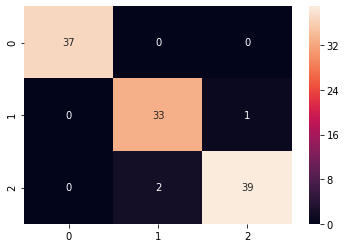

In [126]:
# Training set
cm = confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm, annot=True)

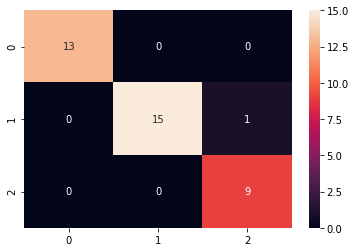

In [127]:
# Training set
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True)

#### Classification report

In [128]:
print(classification_report(y_train,y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.94      0.97      0.96        34
 Iris-virginica       0.97      0.95      0.96        41

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112



In [129]:
print(classification_report(y_test,y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Neural Network

In [130]:
# convert the class data to categorical values - one-hot-encoded vectors
y1 = pd.get_dummies(y)
y1.iloc[:3]

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 7)

### Setup architecture of model

In [133]:
# build a neural network using Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model(input_len, output_len):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = input_len, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(output_len, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

classifier = create_model(X.shape[1],3)

print(classifier.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


### Training model

In [134]:
# fit the model to the training data
classifier.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

W1110 17:54:18.679335  7500 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1110 17:54:19.024446  7500 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/50
105/105 [==============================] - 0s 2ms/step - loss: 1.0973 - accuracy: 0.3524
Epoch 2/50
105/105 [==============================] - 0s 149us/step - loss: 1.0942 - accuracy: 0.3905
Epoch 3/50
105/105 [==============================] - 0s 149us/step - loss: 1.0903 - accuracy: 0.4381
Epoch 4/50
105/105 [==============================] - 0s 149us/step - loss: 1.0851 - accuracy: 0.5238
Epoch 5/50
105/105 [==============================] - 0s 149us/step - loss: 1.0782 - accuracy: 0.5429
Epoch 6/50
105/105 [==============================] - 0s 149us/step - loss: 1.0687 - accuracy: 0.5810
Epoch 7/50
105/105 [==============================] - 0s 149us/step - loss: 1.0561 - accuracy: 0.6381
Epoch 8/50
105/105 [==============================] - 0s 149us/step - loss: 1.0411 - accuracy: 0.6571
Epoch 9/50
105/105 [==============================] - 0s 149us/step - loss: 1.0216 - accuracy: 0.6667
Epoch 10/50
105/105 [==============================] - 0s 311us/step - loss: 1.0007 

### Predicting

In [135]:
# On train set
y_train_pred = classifier.predict_classes(X_train)

# On test set
y_test_pred = classifier.predict_classes(X_test)

### Evaluating models

#### Accuracy score

In [136]:
# On train set
print(accuracy_score(y_train[[1]],y_train_pred))
# On test set
print(accuracy_score(y_test[[1]],y_test_pred))

KeyError: "None of [Int64Index([1], dtype='int64')] are in the [columns]"

#### Confusion matrix

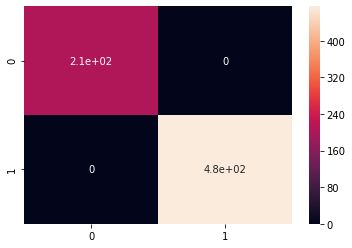

In [640]:
# Training set
cm = confusion_matrix(y_train[[1]],y_train_pred)
sns.heatmap(cm, annot=True)

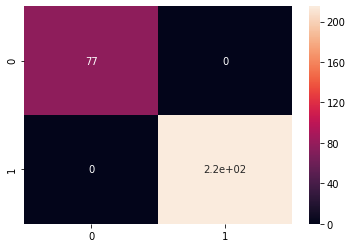

In [641]:
# Training set
cm = confusion_matrix(y_test[[1]],y_test_pred)
sns.heatmap(cm, annot=True)

#### Classification report

In [638]:
print(classification_report(y_train[[1]],y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       475

    accuracy                           1.00       681
   macro avg       1.00      1.00      1.00       681
weighted avg       1.00      1.00      1.00       681



In [639]:
print(classification_report(y_test[[1]],y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       215

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



# Visualising the results

In [85]:
# visualization

plt.figure(figsize=(10 , 10 ))
h = .01 
x_min, x_max = dataset[[0]].min() - 1, dataset[[0]].max() + 1
y_min, y_max = dataset[[1]].min() - 1, dataset[[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='PiYG')
plt.scatter(iv[:, 0], iv[:, 1], c=dv, edgecolors='m', linewidth=0, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-NN model", fontsize='large')
plt.xlabel('sepal length ')
plt.ylabel('sepal width')
plt.xticks(())
plt.yticks(())
plt.show()


KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

<Figure size 720x720 with 0 Axes>